In [1]:
import numpy as np
import pandas as pd

In [2]:
def make_histogram(ax, tp, fp, n_bins):
    ax.hist(tp, n_bins, color='r', log=True, histtype='step', label='Yes matches')
    ax.hist(fp, n_bins, color='b', log=True, histtype='step', label='No matches')
    ax.legend()

In [18]:
def prm_matches_bins(cat_name, true_cats_dir = '/home/rt2122/Data/original_catalogs/csv/', prm='max_pred',
                    match_dist = 5/60, n_bins=20, figsize=(27, 6), in_val_pix=False, ylim=5, add_all_cats=False):
    import os
    import numpy as np
    import pandas as pd
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    from matplotlib import pyplot as plt
    from DS_Planck_Unet import val_pix
    from DS_healpix_fragmentation import radec2pix
    
    true_cats_files = next(os.walk(true_cats_dir))[-1]
    true_cats_files = [os.path.join(true_cats_dir, file) for file in true_cats_files]    
    true_cats = {os.path.splitext(os.path.basename(file))[0] : pd.read_csv(file) for file in true_cats_files}
    
    det_cat = pd.read_csv(cat_name)
    det_cat = det_cat[det_cat['status'] != 'fn']
    if in_val_pix:
        det_cat['pix2'] = radec2pix(det_cat['RA'], det_cat['DEC'], 2)
        det_cat = det_cat.iloc[np.in1d(det_cat['pix2'], val_pix)]
    det_sc = SkyCoord(ra=np.array(det_cat['RA'])*u.degree, 
                                  dec=np.array(det_cat['DEC'])*u.degree, frame='icrs')
    det_cat = np.array(det_cat[prm])
    
    _, ax = plt.subplots(1, len(true_cats_files) + add_all_cats, figsize=figsize, sharex=True, sharey=True)

    for i, tr_name in enumerate(true_cats): 
        tr = true_cats[tr_name]
        tr_sc = SkyCoord(ra=np.array(tr['RA'])*u.degree, 
                      dec=np.array(tr['DEC'])*u.degree, frame='icrs')

        idx, d2d, _ = det_sc.match_to_catalog_sky(tr_sc)
        matched = d2d.degree <= match_dist
        
        tp = det_cat[matched]
        fp = det_cat[matched == 0]
        
        make_histogram(ax[i], tp, fp, n_bins)
        ax[i].set_xlabel(tr_name)
        ax[i].set_yticks([10 ** i for i in range(ylim)])
        ax[i].set_ylim(10**-0.2, 10**ylim)
        ax[i].grid()
    if add_all_cats:
        det_cat = pd.read_csv(cat_name)
        tp = det_cat[det_cat['status'] == 'tp'][prm]
        fp = det_cat[det_cat['status'] == 'fp'][prm]
        i = len(true_cats_files)
        make_histogram(ax[i], tp, fp, n_bins)
        ax[i].set_xlabel('all true cats')
        ax[i].set_yticks([10 ** i for i in range(ylim)])
        ax[i].set_ylim(10**-0.2, 10**ylim)
        ax[i].grid()

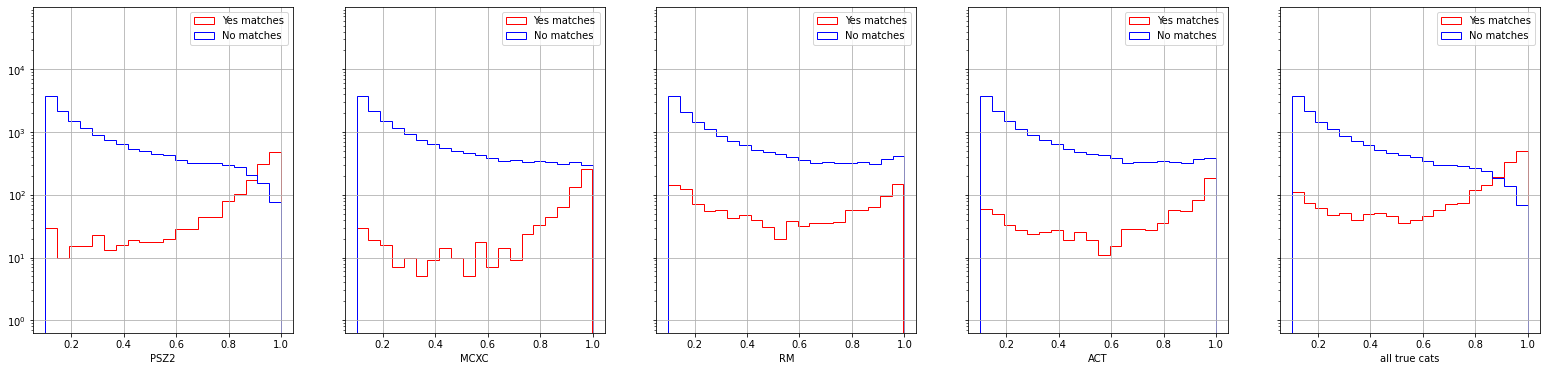

In [19]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv', add_all_cats=True)

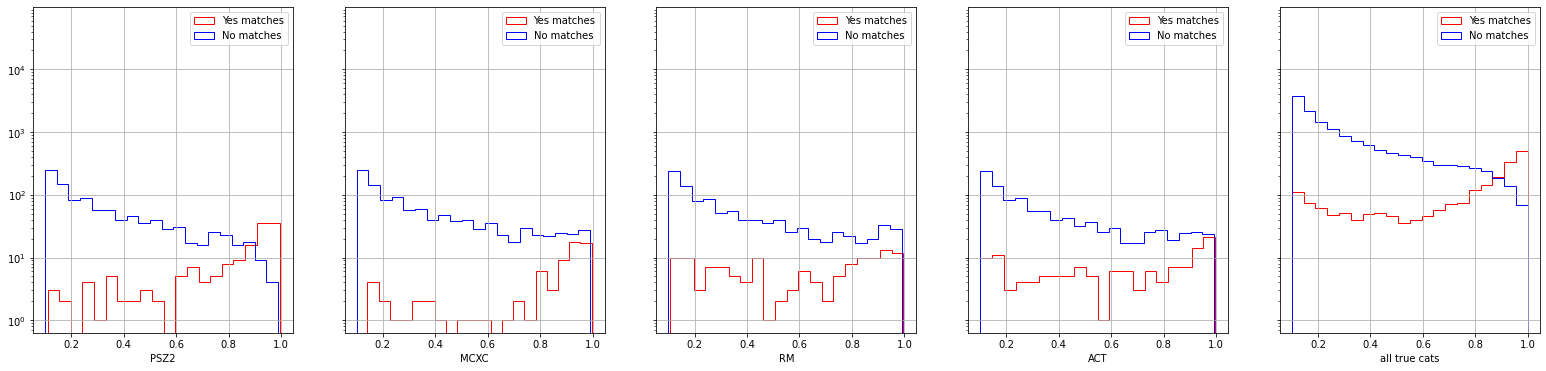

In [20]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz14_thr0.1_step8.csv', in_val_pix=True, add_all_cats=True)

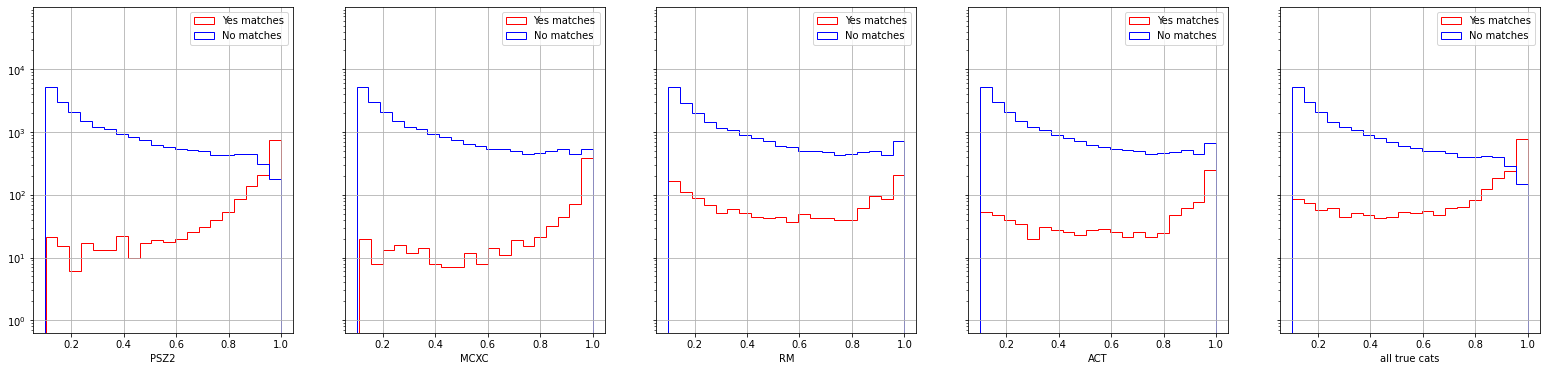

In [21]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8.csv', add_all_cats=True)

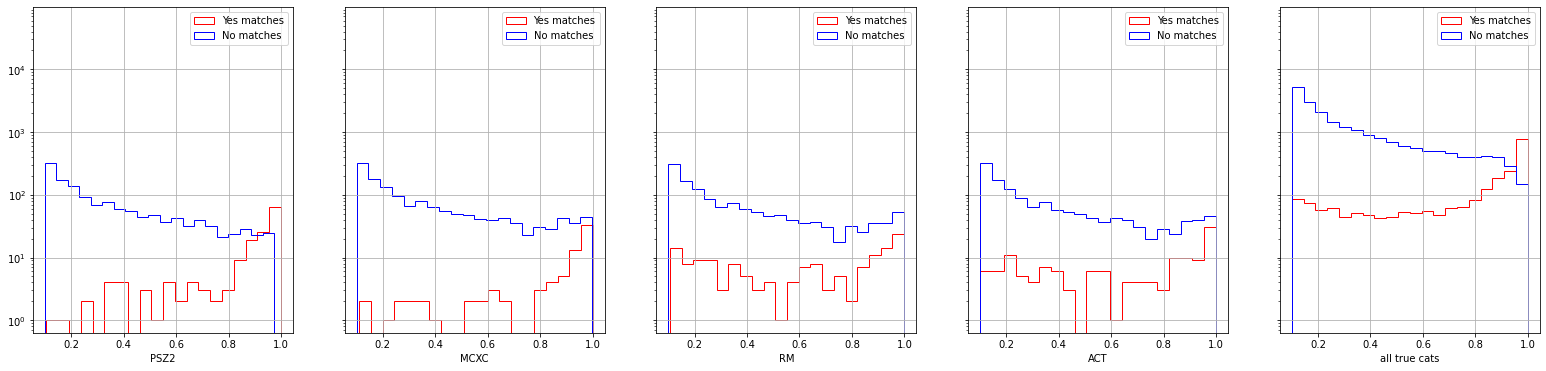

In [22]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_rot28_thr0.1_step8.csv', in_val_pix=True, add_all_cats=True)

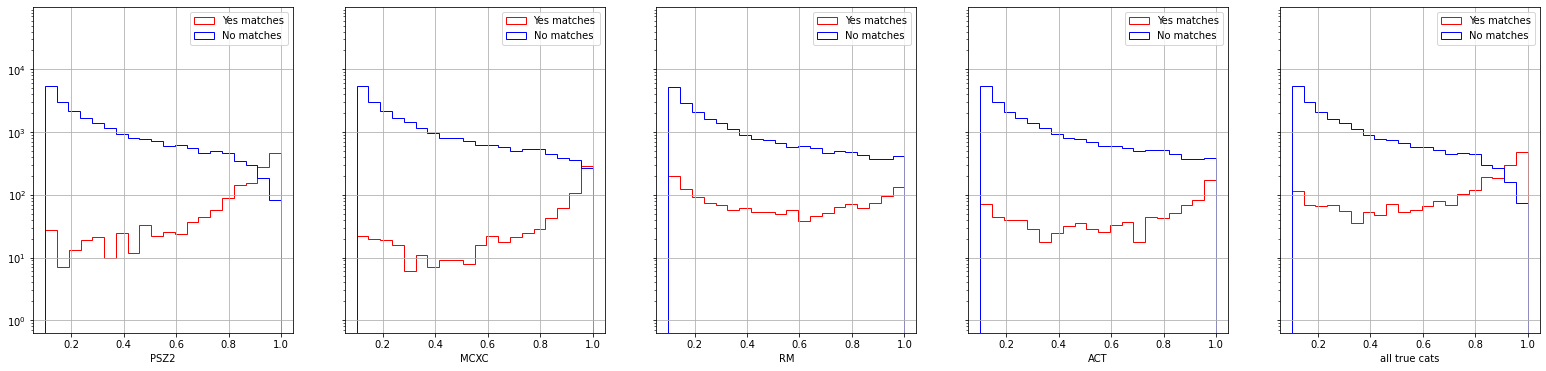

In [23]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_act_feb_rot_drop0.2_ep10_thr0.1_step8.csv', add_all_cats=True)

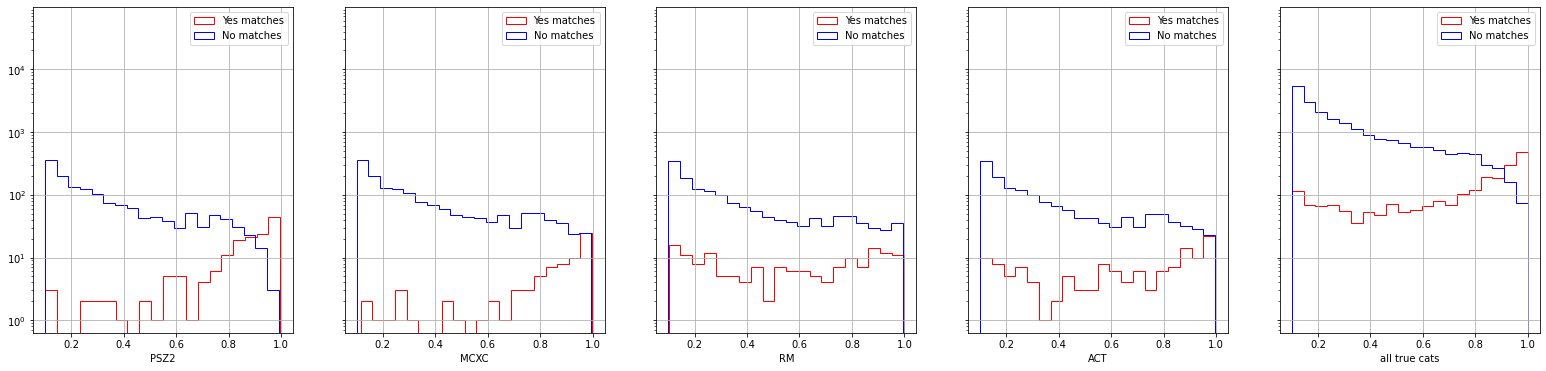

In [24]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_act_feb_rot_drop0.2_ep10_thr0.1_step8.csv', in_val_pix=True, add_all_cats=True)

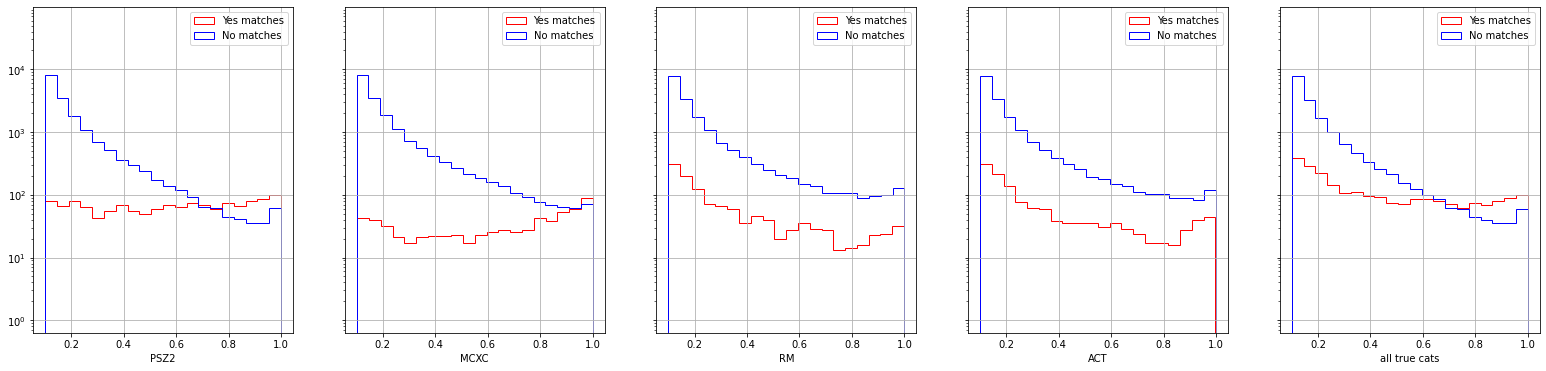

In [25]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_act14_thr0.1_step8.csv', add_all_cats=True)

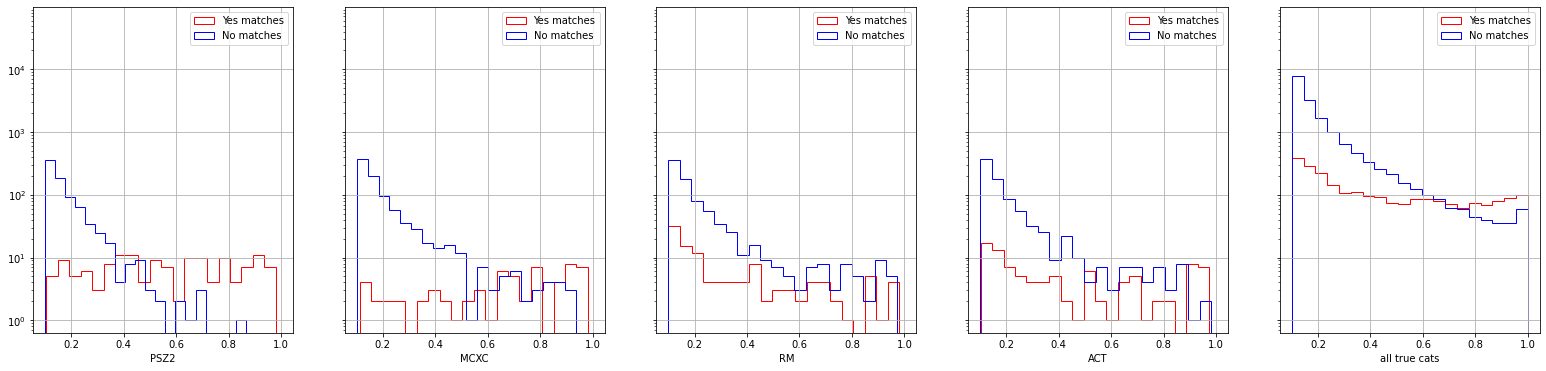

In [26]:
prm_matches_bins('/home/rt2122/Data/detected_cats/full_pz_act14_thr0.1_step8.csv', in_val_pix=True ,add_all_cats=True)